# Project: Analyze TMDB Movie Data 

&emsp;__Muhammad Ariq Farhansyah Mutyara__<br>
&emsp;__Sunday, 10th May 2020__<br>
&emsp;__Indonesia__

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">Reference</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset comes from kaggle which we could click on [here](https://www.kaggle.com/tmdb/tmdb-movie-metadata). It is cleaned before to make It easier to practice for Udacity DAND Student. Note that this project is just for learning purposes. It contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

There are a few questions that needs to be answered from this dataset. These questions are mentioned below:
 - What is The 10 Most Produced Genres of All Time? 
 - What are The 10 Highest Grossing Movies of All Time?
 - Who are The 10 Actors Occurred in a Movie The Most?
 - What is The 10 Most Expensive Movie Ever Made? 
 - What kinds of properties are associated with movies that have high revenues?



In [1]:
# Set up import statements for all of the packages that is essential for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load the data and print out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
# Shows Statistical information about the dataset
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

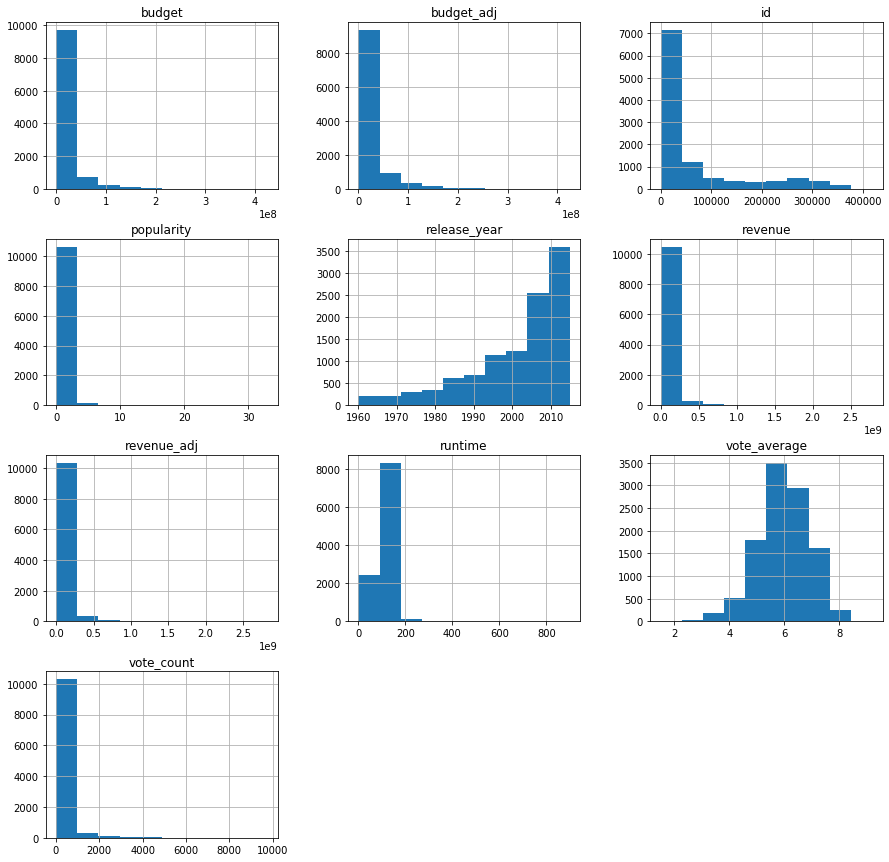

In [4]:
# Shows the distibution from each variable
df.hist(figsize = (15, 15));

In [5]:
# Shows overall information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Shows the dimensionality(rows and columns) of the dataset
df.shape

(10866, 21)

In [7]:
df.duplicated().sum()

1

There are many problems that needs to be cleaned before we begin to analyze the dataset that were given. Those problems are :

1. Columns that are not essential to the analysis. Those columns are :
    - imdb_id
    - homepage
    - tagline
    - keywords
    - overview
    - release_date
2. Essential columns that has many '0' value that acted like 'NaN' and has a scientific format. Those columns are :
    - budget
    - revenue
    - runtime
    - budget_adj
    - revenue_adj
3. Essential columns that has a missing value and contain multiple values separated by '|' character. Those columns are :      
    - cast
    - director
    - genres
    - production_companies

And there is one duplicated row that is not very a big of the deal. We could drop this right away with `drop_duplicate()` method. This row is :

In [8]:
df[df.duplicated()]

id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]

### Data Cleaning

First of, we begin with dropping one row with duplicated values in it.

In [9]:
# Drop the row that has a duplicated values
df.drop_duplicates(inplace = True)

Now, the row has been dropped, next is we do this with step by step corresponding the problems mentioned above.

#### 1. Drop the non - essential columns

In [10]:
# list of columns name that needs to be dropped
coll = ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'release_date']

# Drop the columns
df.drop(coll, axis = 1, inplace = True)

#### 2. Change the number format and drop the missing value

In [11]:
# Change the scientific to numeric format
pd.options.display.float_format = '{:.2f}'.format

In [12]:
# Replace the 0 values to NaN to make it easier to drop with another missing value
coll = ['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
df[coll] = df[coll].replace({0:np.nan})

# Drop all the missing value
df.dropna(inplace = True)

#### 3. Split the string that has '|'

In [13]:
# Split the string into several columns
df_cast = df.cast.str.split('|', expand = True).rename(columns = lambda x : 'cast_' + str(x + 1))
df_director = df.director.str.split('|', expand = True).rename(columns = lambda x : 'director_' + str(x + 1))
df_genres = df.genres.str.split('|', expand = True).rename(columns = lambda x : 'genres_' + str(x + 1))
df_production_companies = df.production_companies.str.split('|', expand = True).rename(columns = lambda x : 'production_companies_' + str(x + 1))

In [14]:
# Join the new separated columns to original dataset
df = df.join([df_cast, df_director, df_genres, df_production_companies])

# Drop original columns that contains '|'
coll = ['cast', 'director', 'genres', 'production_companies']
df.drop(coll, axis = 1, inplace = True)

In [15]:
# Check the overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3805 non-null   int64  
 1   popularity              3805 non-null   float64
 2   budget                  3805 non-null   float64
 3   revenue                 3805 non-null   float64
 4   original_title          3805 non-null   object 
 5   runtime                 3805 non-null   float64
 6   vote_count              3805 non-null   int64  
 7   vote_average            3805 non-null   float64
 8   release_year            3805 non-null   int64  
 9   budget_adj              3805 non-null   float64
 10  revenue_adj             3805 non-null   float64
 11  cast_1                  3805 non-null   object 
 12  cast_2                  3802 non-null   object 
 13  cast_3                  3802 non-null   object 
 14  cast_4                  3794 non-null  

Looks like it is cleaned. But there are some columns that contains a few values on its rows and . So that we would like to drop the columns and rows because it is not impacted much on the analysis, we just drop some of the columns. Those columns are :
- director_3
- director_4
- director_5
- director_6
- director_7
- director_8
- director_9
- director_10
- director_11
- director_12

Because it is interconnected, so we just use one columns for indexing to drop a rows. That is the column `director_3` since it has the biggest non-null values than any other columns which also would be dropped.

In [16]:
# Drop the rows that contains a few value in the columns
df.drop(df[df.director_3.notnull()].index, inplace = True)

# Drop the columns mentioned above
coll = df.columns[18:28].tolist()
df.drop(coll, axis = 1, inplace = True)

In [17]:
# Check the overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3772 entries, 0 to 10848
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3772 non-null   int64  
 1   popularity              3772 non-null   float64
 2   budget                  3772 non-null   float64
 3   revenue                 3772 non-null   float64
 4   original_title          3772 non-null   object 
 5   runtime                 3772 non-null   float64
 6   vote_count              3772 non-null   int64  
 7   vote_average            3772 non-null   float64
 8   release_year            3772 non-null   int64  
 9   budget_adj              3772 non-null   float64
 10  revenue_adj             3772 non-null   float64
 11  cast_1                  3772 non-null   object 
 12  cast_2                  3769 non-null   object 
 13  cast_3                  3769 non-null   object 
 14  cast_4                  3761 non-null  

In [18]:
# Check the dimensionality
df.shape

(3772, 28)

The data looks great now. No other problems that needs to be solved. The data now is clean and neat, ready to be analyzed in the next section.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : What is The 10 Most Produced Genres of All Time? 

First we get all the genres columns and sort the genres with `stack()` to put the genres_1 to genres_5 back together. And use the `value_counts()` method to count the unique vallue.

In [19]:
# Get all genres columns
df_genres = df.loc[:,'genres_1' : 'genres_5']

# Get the 10 highest value_counts from all genres columns 
df_genres = df_genres.stack().value_counts().iloc[:10].sort_values(ascending = True)
df_genres

Family              400
Horror              457
Science Fiction     513
Crime               648
Romance             655
Adventure           731
Action             1067
Thriller           1190
Comedy             1320
Drama              1720
dtype: int64

After we get the all the genres counted from the most to the least. We visualize it with Horizontal Bar Chart since it is the best way to visualize categorical data. 

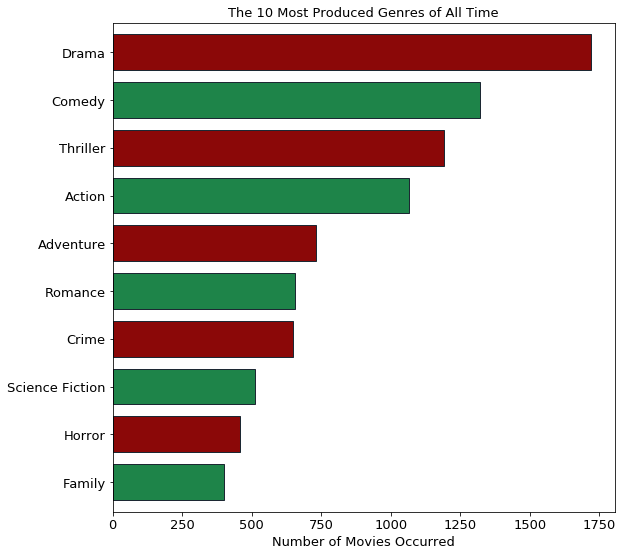

In [20]:
# Make a Visualization
df_genres.plot.barh(color = ['#1E8449', '#8B0808'], edgecolor = '#1C2833', fontsize = 13, figsize = (9, 9), width = 0.75)
plt.title("The 10 Most Produced Genres of All Time", fontsize = 13)
plt.xlabel('Number of Movies Occurred', fontsize = 13);

What we see here. The most produced genres of all time is Drama followed by Comedy, Thriller, Action, and so on.

### Research Question 2 : What are The 10 Highest Grossing Movies of All Time?

In this question, we try to sort the value by 'revenue_adj' since it is the most measurable component due to the fact that it is adjusted by inflation. Then we get the three important columns which are 'original_title', 'revenue_adj, and 'release_year'. We use 'release_year' column to make the movie title looks more fancy and to know which year the movie released.

In [21]:
# Get the 10 row data sorted by highest value of revenue_adj 
df_revenue = df.sort_values(by = 'revenue_adj', ascending = False, ignore_index = True).head(10)

# Get the original_title and revenue_adj columns data only 
df_revenue = df_revenue.loc[:, ['original_title', 'revenue_adj', 'release_year']]
df_revenue

original_title   revenue_adj  release_year
0                        Avatar 2827123750.41          2009
1                     Star Wars 2789712242.28          1977
2                       Titanic 2506405735.42          1997
3                  The Exorcist 2167324901.20          1973
4                          Jaws 1907005841.92          1975
5  Star Wars: The Force Awakens 1902723129.80          2015
6    E.T. the Extra-Terrestrial 1791694309.25          1982
7                       The Net 1583049536.35          1995
8                  The Avengers 1443191435.21          2012
9       The Empire Strikes Back 1424626187.77          1980

Now we get the 10 row data with the highest 'revenue_adj' value. The code below we try to merge the `original_title` and `release_year` value and pass the data to a new series.

In [22]:
# Make a new orginal_title with release_year
index = ['{} ({})'.format(df_revenue['original_title'][i], str(df_revenue['release_year'][i])) for i in range(10)]
data = df_revenue.revenue_adj.tolist()
# Make it to the series
df_revenue = pd.Series(data, index).sort_values(ascending = True)
df_revenue

The Empire Strikes Back (1980)        1424626187.77
The Avengers (2012)                   1443191435.21
The Net (1995)                        1583049536.35
E.T. the Extra-Terrestrial (1982)     1791694309.25
Star Wars: The Force Awakens (2015)   1902723129.80
Jaws (1975)                           1907005841.92
The Exorcist (1973)                   2167324901.20
Titanic (1997)                        2506405735.42
Star Wars (1977)                      2789712242.28
Avatar (2009)                         2827123750.41
dtype: float64

After that, we want to visualize it. But we have to format the tick value in x axis first since it is too large to visualize it and to make it easier to understand. 

In [23]:
# Function to format the tick value for visualization
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values 
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # Make a new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # Keep 4.5M as it is but change values such as 4.0M to 4M
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

Now we get the new function to format the tick value. Let us visualize it below with Horizontal Bar Chart since it is great way to visualize categorical data . 

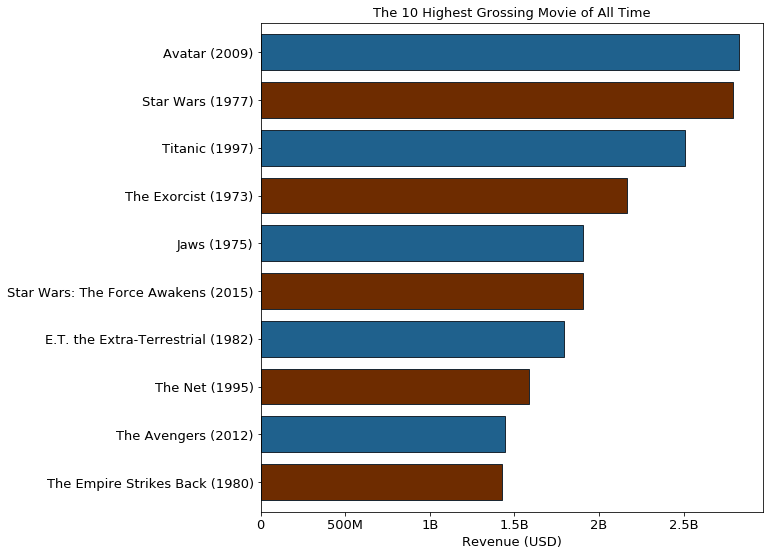

In [24]:
df_revenue.plot.barh(color = ['#6E2C00', '#1F618D'], edgecolor = '#1C2833', fontsize = 13, figsize = (9, 9), width = 0.75)
plt.title('The 10 Highest Grossing Movie of All Time', fontsize = 13)
plt.xlabel('Revenue (USD)', fontsize = 13);
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

What we see here. Avatar (2009) is the most profitable movie of all time followed by Star Wars (1977), Titanic (1997), The Exorcist (1973), and so on.

### Research Question 3 : Who are The 10 Actors Occurred in a Movie The Most?

In this questio, we get all the casts columns and sort the it with `stack()` to put the cast_1 to cast_5 back together. And use the `value_counts()` method to count the unique vallue. This code below basically is the same as the question 1 above.

In [25]:
# Get all cast columns
df_cast = df.loc[:,'cast_1' : 'cast_5']

# Get the 10 highest value_counts from all cast columns 
df_cast = df_cast.stack().value_counts().iloc[:10]
df_cast

Robert De Niro        51
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Morgan Freeman        34
Harrison Ford         34
Sylvester Stallone    34
Brad Pitt             34
dtype: int64

After we get the all the cast counted from the most to the least. We visualize it now to make it looks fancier. We use the Bar chart to make it look different from any other chart that we use. Even though Horizontal Bar Chart is the great way to visualize it with categorical data like this one.

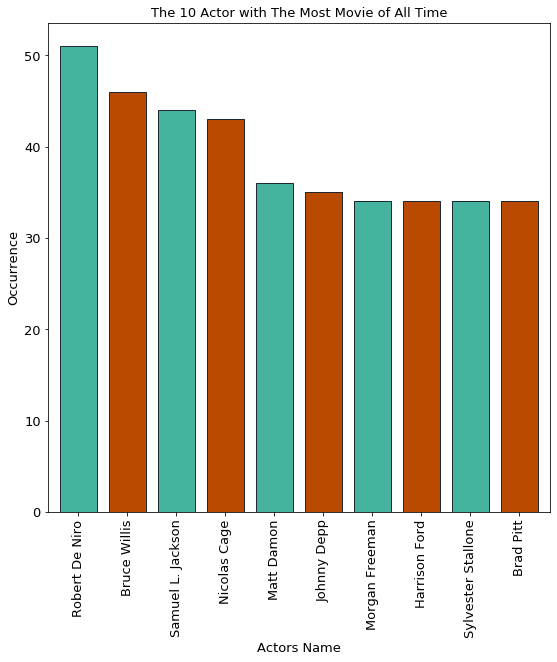

In [26]:
df_cast.plot.bar(color = ['#45B39D', '#BA4A00'], edgecolor = '#1C2833', fontsize = 13, figsize = (9, 9), width = 0.75)
plt.title('The 10 Actor with The Most Movie of All Time', fontsize = 13)
plt.xlabel('Actors Name', fontsize = 13)
plt.ylabel('Occurrence', fontsize = 13);

Now we know that Robert De Niro is the most occurred actor in the movie followed by Bruce Willis, Samuel L. Jackson, Nicolas Cage, and so on.

### Research Question 4 : What is The 10 Most Expensive Movie Ever Made? 

In this question, we try to sort the value by 'budget_adj' and the code we use is similiar from the question 2.

In [27]:
# Get the 10 row data sorted by highest value of revenue_adj 
df_budget = df.sort_values(by = 'budget_adj', ascending = False, ignore_index = True).head(10)

# Get the original_title and revenue_adj columns data only 
df_budget = df_budget.loc[:, ['original_title', 'budget_adj', 'release_year']]
df_budget

original_title   budget_adj  release_year
0                            The Warrior's Way 425000000.00          2010
1  Pirates of the Caribbean: On Stranger Tides 368371256.18          2011
2     Pirates of the Caribbean: At World's End 315500574.79          2007
3                             Superman Returns 292050672.74          2006
4                                      Titanic 271692064.21          1997
5                                 Spider-Man 3 271330494.32          2007
6                                      Tangled 260000000.00          2010
7                      Avengers: Age of Ultron 257599886.66          2015
8       Harry Potter and the Half-Blood Prince 254100108.53          2009
9                                   Waterworld 250419201.74          1995

Now, we try to merge the `original_title` and `release_year` value and pass the data to a new series below.

In [28]:
# Make a new orginal_title with release_year
index = ['{} ({})'.format(df_budget['original_title'][i], str(df_budget['release_year'][i])) for i in range(10)]
data = df_budget.budget_adj.tolist()
# Make it to the series
df_budget = pd.Series(data, index).sort_values(ascending = True)
df_budget

Waterworld (1995)                                    250419201.74
Harry Potter and the Half-Blood Prince (2009)        254100108.53
Avengers: Age of Ultron (2015)                       257599886.66
Tangled (2010)                                       260000000.00
Spider-Man 3 (2007)                                  271330494.32
Titanic (1997)                                       271692064.21
Superman Returns (2006)                              292050672.74
Pirates of the Caribbean: At World's End (2007)      315500574.79
Pirates of the Caribbean: On Stranger Tides (2011)   368371256.18
The Warrior's Way (2010)                             425000000.00
dtype: float64

Now, Let us visualize it with Horizontal Bar Chart.

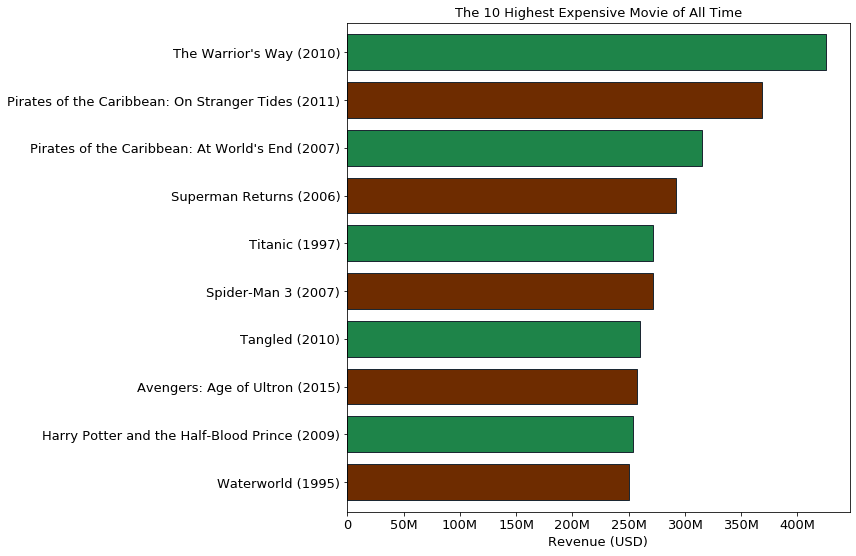

In [29]:
df_budget.plot.barh(color = ['#6E2C00', '#1E8449'], edgecolor = '#1C2833', fontsize = 13, figsize = (9, 9), width = 0.75)
plt.title('The 10 Highest Expensive Movie of All Time', fontsize = 13)
plt.xlabel('Revenue (USD)', fontsize = 13);
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

The most expensive movie to be ever made is The Warrior's Way (2010) followed by two Pirates of The Caribean movie.

### Research Question 5 : What kinds of properties are associated with movies that have high revenues?

If we want to find the relationship between high revenues with the other columns. We use the `corr()` method to get the value of correlation between the column. We use 'revenue_adj' column since it is the most measurable due to the fact that the value is adjusted by inflation.

In [30]:
df.corr()

id  popularity  budget  revenue  runtime  vote_count  \
id            1.00        0.19   -0.03    -0.00    -0.04        0.11   
popularity    0.19        1.00    0.44     0.62     0.22        0.78   
budget       -0.03        0.44    1.00     0.68     0.27        0.55   
revenue      -0.00        0.62    0.68     1.00     0.26        0.75   
runtime      -0.04        0.22    0.27     0.26     1.00        0.28   
vote_count    0.11        0.78    0.55     0.75     0.28        1.00   
vote_average  0.00        0.32    0.02     0.23     0.37        0.39   
release_year  0.49        0.18    0.27     0.14    -0.11        0.21   
budget_adj   -0.13        0.40    0.96     0.66     0.33        0.50   
revenue_adj  -0.09        0.55    0.53     0.90     0.29        0.66   

              vote_average  release_year  budget_adj  revenue_adj  
id                    0.00          0.49       -0.13        -0.09  
popularity            0.32          0.18        0.40         0.55  
budget                0.02          0.27        0.96         0.53  
revenue               0.23          0.14        0.66         0.90  
runtime               0.37         -0.11        0.33         0.29  
vote_count            0.39          0.21        0.50         0.66  
vote_average          1.00         -0.13        0.03         0.27  
release_year         -0.13          1.00        0.08        -0.10  
budget_adj            0.03          0.08        1.00         0.57  
revenue_adj           0.27         -0.10        0.57         1.00

Now let us try to visualize it with scatter to look at the connection between 'revenue_adj' column with another columns.Note that we don't consider the 'budget' and 'revenue' column as the measurement even though their value is positive as well.

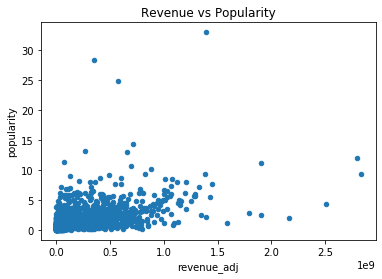

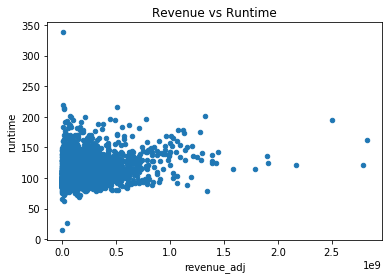

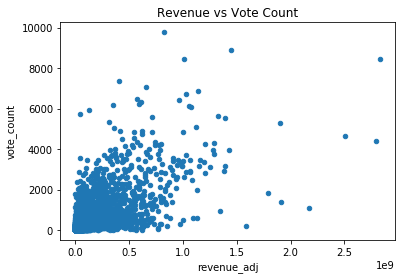

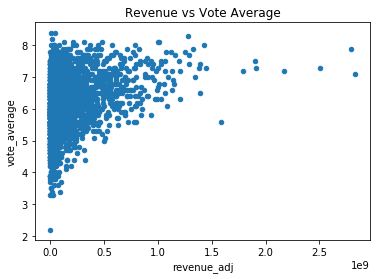

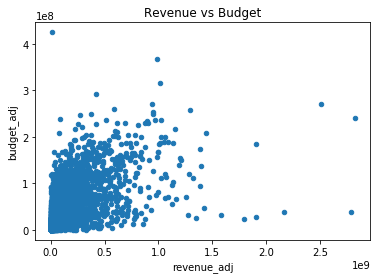

In [31]:
df.plot.scatter(x = 'revenue_adj', y = 'popularity')
plt.title("Revenue vs Popularity")
df.plot.scatter(x = 'revenue_adj', y = 'runtime')
plt.title("Revenue vs Runtime")
df.plot.scatter(x = 'revenue_adj', y = 'vote_count')
plt.title("Revenue vs Vote Count")
df.plot.scatter(x = 'revenue_adj', y = 'vote_average')
plt.title("Revenue vs Vote Average")
df.plot.scatter(x = 'revenue_adj', y = 'budget_adj')
plt.title("Revenue vs Budget");

Looks like all of the distribution between 'revenue_adj' with another columns are really strong but the data point is spread in one place.

<a id='conclusions'></a>
## Conclusions

After the analysis that we made, we could conclude that :

1. Drama is the most produced genre for almost 1750 movie made followed by Comedy, Thriller, Action, and so on based on the visualization on question 1.
2. Avatar (2009) is the most profitable movie of all time for more than 2.5 Billion US Dollar.
3. Robert De Niro is the most occurred actor for more than 50 movie ever made followed by Bruce Willis, Samuel L. Jackson, Nicolas Cage, and so on.
4. The Warrior's Way (2010) is the most expensive movie to be ever made for more than 400 Million US Dollar followed by Pirates of the Caribbean: On Stranger Tides (2011) and Pirates of the Caribbean: At World's End (2007) on 2nd and 3rd respectively.
5. There is a strong distribution between revenue_adj with all of the column. But the correlation between these columns is not high enough since the distribution between the data point is spread in one place.

__Note__ : For question 2 and 4, the profit and budget are adjusted by inflation from 2010 US Dollar and provided in the dataset. The Analysis is limited to the data set that were given and as no advaned statistics were performed, and there are many rows that has a missing value so that also affected the overall analysis.

<a id='reference'></a>
## Code Reference

- https://stackoverflow.com/questions/48958282/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python (split the string)
- https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/ (format the scientific to numeric)
- https://pyformat.info/#number (format the scientific to numeric)
- https://stackoverflow.com/questions/45416684/python-pandas-replace-multiple-columns-zero-to-nan?rq=1 (replacing zero value to NaN)
- https://dfrieds.com/data-visualizations/how-format-large-tick-values.html (format visualization tick value)